In [1]:
library(ggplot2)
library(stats)
library(dplyr)
library(tidyverse)
library(rstatix)
library(ggpubr)
library(parallel)


Warning message:
“package ‘dplyr’ was built under R version 4.3.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘tidyverse’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘readr’ was built under R version 4.3.3”
Warning message:
“package ‘purrr’ was built under R version 4.3.3”
Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘forcats’ was built under R version 4.3.3”
Warning message:
“package ‘lubridate’ was built under R version 4.3.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     

In [2]:
meta_data<-read.csv("/home//workspace/IHA_Review_Analysis/Other_Analysis/13_MSD_HAI_analysis/meta_data.csv")
meta_data_subset <- meta_data %>%
    filter(Visit_Type == "FluYear", Flu_Year %in% c("2020-2021", "2021-2022"), Flu_Day != "Stand-Alone") %>%
    group_by(subjectGuid, Flu_Year) %>%
    mutate(entry_count = n()) %>%
    filter(entry_count == 3) %>%

    ungroup()

In [3]:
composite_score<-read.csv('/home//workspace/private/bri_figure_all_files_test/jupyter/BRI_Figures_Final_V2/Figure1/04_CompositeScore/BRI_CompositeScore_Up.csv')

In [4]:
composite_score<-composite_score %>% filter(celltype=="CM CD4 T cell")%>% select(pbmc_sample_id,composite_score_sum_scaled_mean	)

In [5]:
composite_score<-composite_score%>% filter(pbmc_sample_id %in% meta_data_subset$pbmc_sample_id)
composite_score<-left_join(composite_score,meta_data_subset %>% select(pbmc_sample_id,subjectGuid,Flu_Year,Flu_Day)) %>% ungroup()

Joining with `by = join_by(pbmc_sample_id)`


# Responder Group

In [6]:
response_group<-read.csv('lm_res.csv')

In [7]:
colnames(response_group)

[1] "X"                 "subjectGuid"       "residual"         
[4] "responder"         "cohort.cohortGuid" "Assay"            
[7] "Flu_Year"

In [8]:
response_group<-left_join(response_group,composite_score %>% filter(Flu_Day=="Day_0"),by=c("Flu_Year","subjectGuid"	))

In [9]:
head(response_group)

,X,subjectGuid,residual,responder,cohort.cohortGuid,Assay,Flu_Year,pbmc_sample_id,composite_score_sum_scaled_mean,Flu_Day
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,A/Guangdong-2020-2021.1,BR1004,-0.3611660,middle responder,BR1,A/Guangdong,2020-2021,PB00335-05,-77.92716,Day_0
2,A/Guangdong-2020-2021.2,BR2009,-0.5396759,middle responder,BR2,A/Guangdong,2020-2021,PB00334-01,20.39471,Day_0
3,A/Guangdong-2020-2021.3,BR1011,0.2182278,middle responder,BR1,A/Guangdong,2020-2021,PB00336-05,-109.41750,Day_0
4,A/Guangdong-2020-2021.4,BR1037,-0.3782780,middle responder,BR1,A/Guangdong,2020-2021,PB00341-01,-18.90045,Day_0
5,A/Guangdong-2020-2021.5,BR2025,1.3098246,high responder,BR2,A/Guangdong,2020-2021,PB00342-01,-11.25438,Day_0
6,A/Guangdong-2020-2021.6,BR1021,-0.5174366,middle responder,BR1,A/Guangdong,2020-2021,PB00338-01,-36.28708,Day_0


Warning message:
“Removed 20 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 20 rows containing non-finite values (`stat_compare_means()`).”
Warning message:
“Removed 20 rows containing missing values (`geom_point()`).”


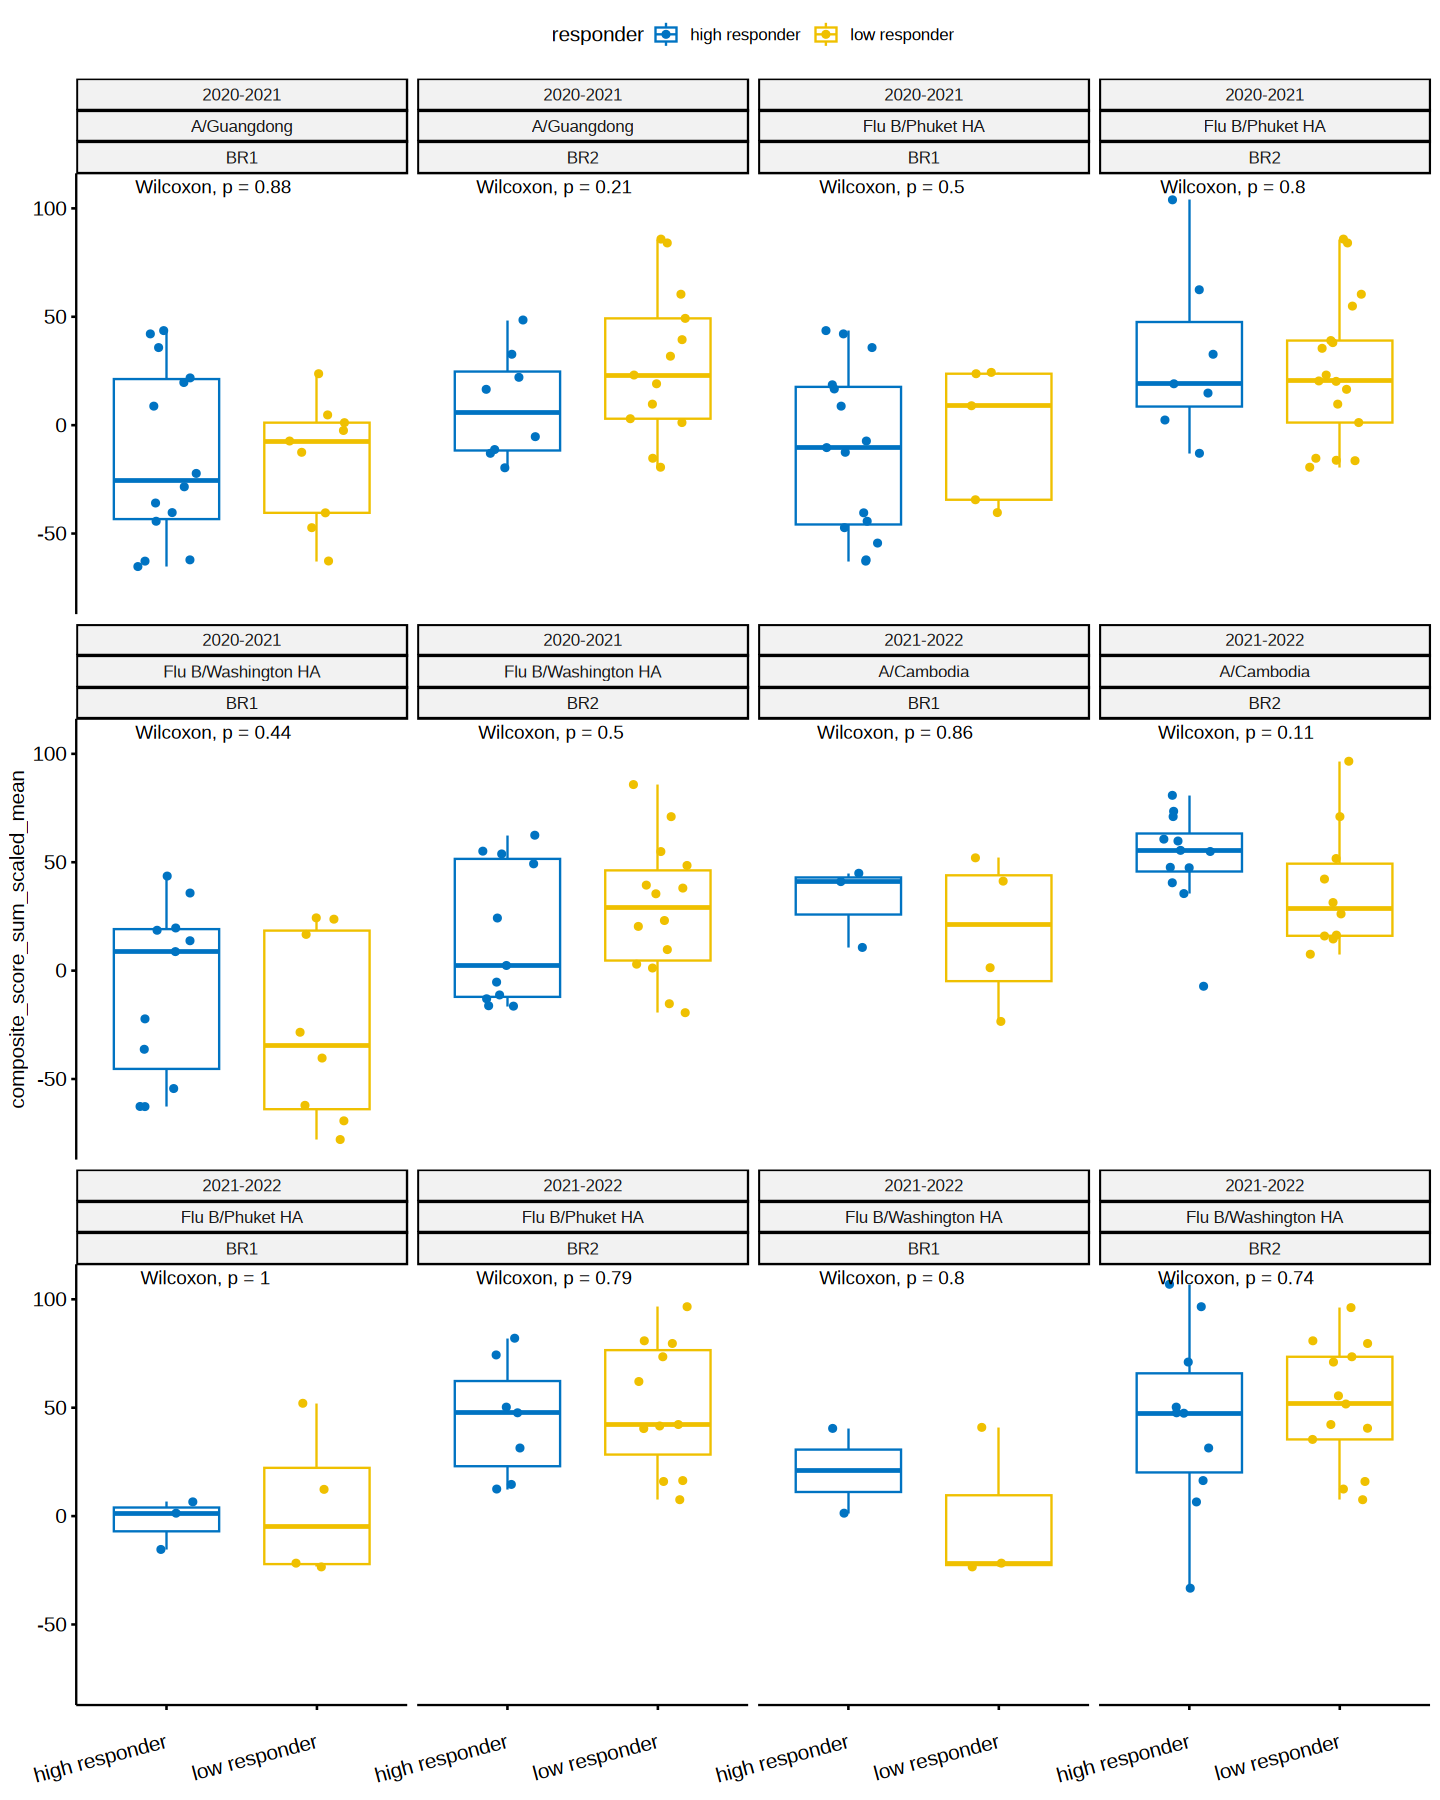

In [11]:
options(repr.plot.width = 12, repr.plot.height = 15)

ggboxplot(
response_group %>% filter(responder
                          %in% c("low responder","high responder")),
    x = "responder", y = "composite_score_sum_scaled_mean", color = "responder", palette = "jco",
    add = "jitter"
) + stat_compare_means() +
facet_wrap(~ Flu_Year +Assay +cohort.cohortGuid, ncol = 4) + theme(axis.text.x = element_text(
    angle = 15, vjust = 0.5,
    hjust = 1
))+xlab("")

Warning message:
“Removed 20 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 20 rows containing non-finite values (`stat_compare_means()`).”
Warning message:
“Removed 20 rows containing missing values (`geom_point()`).”


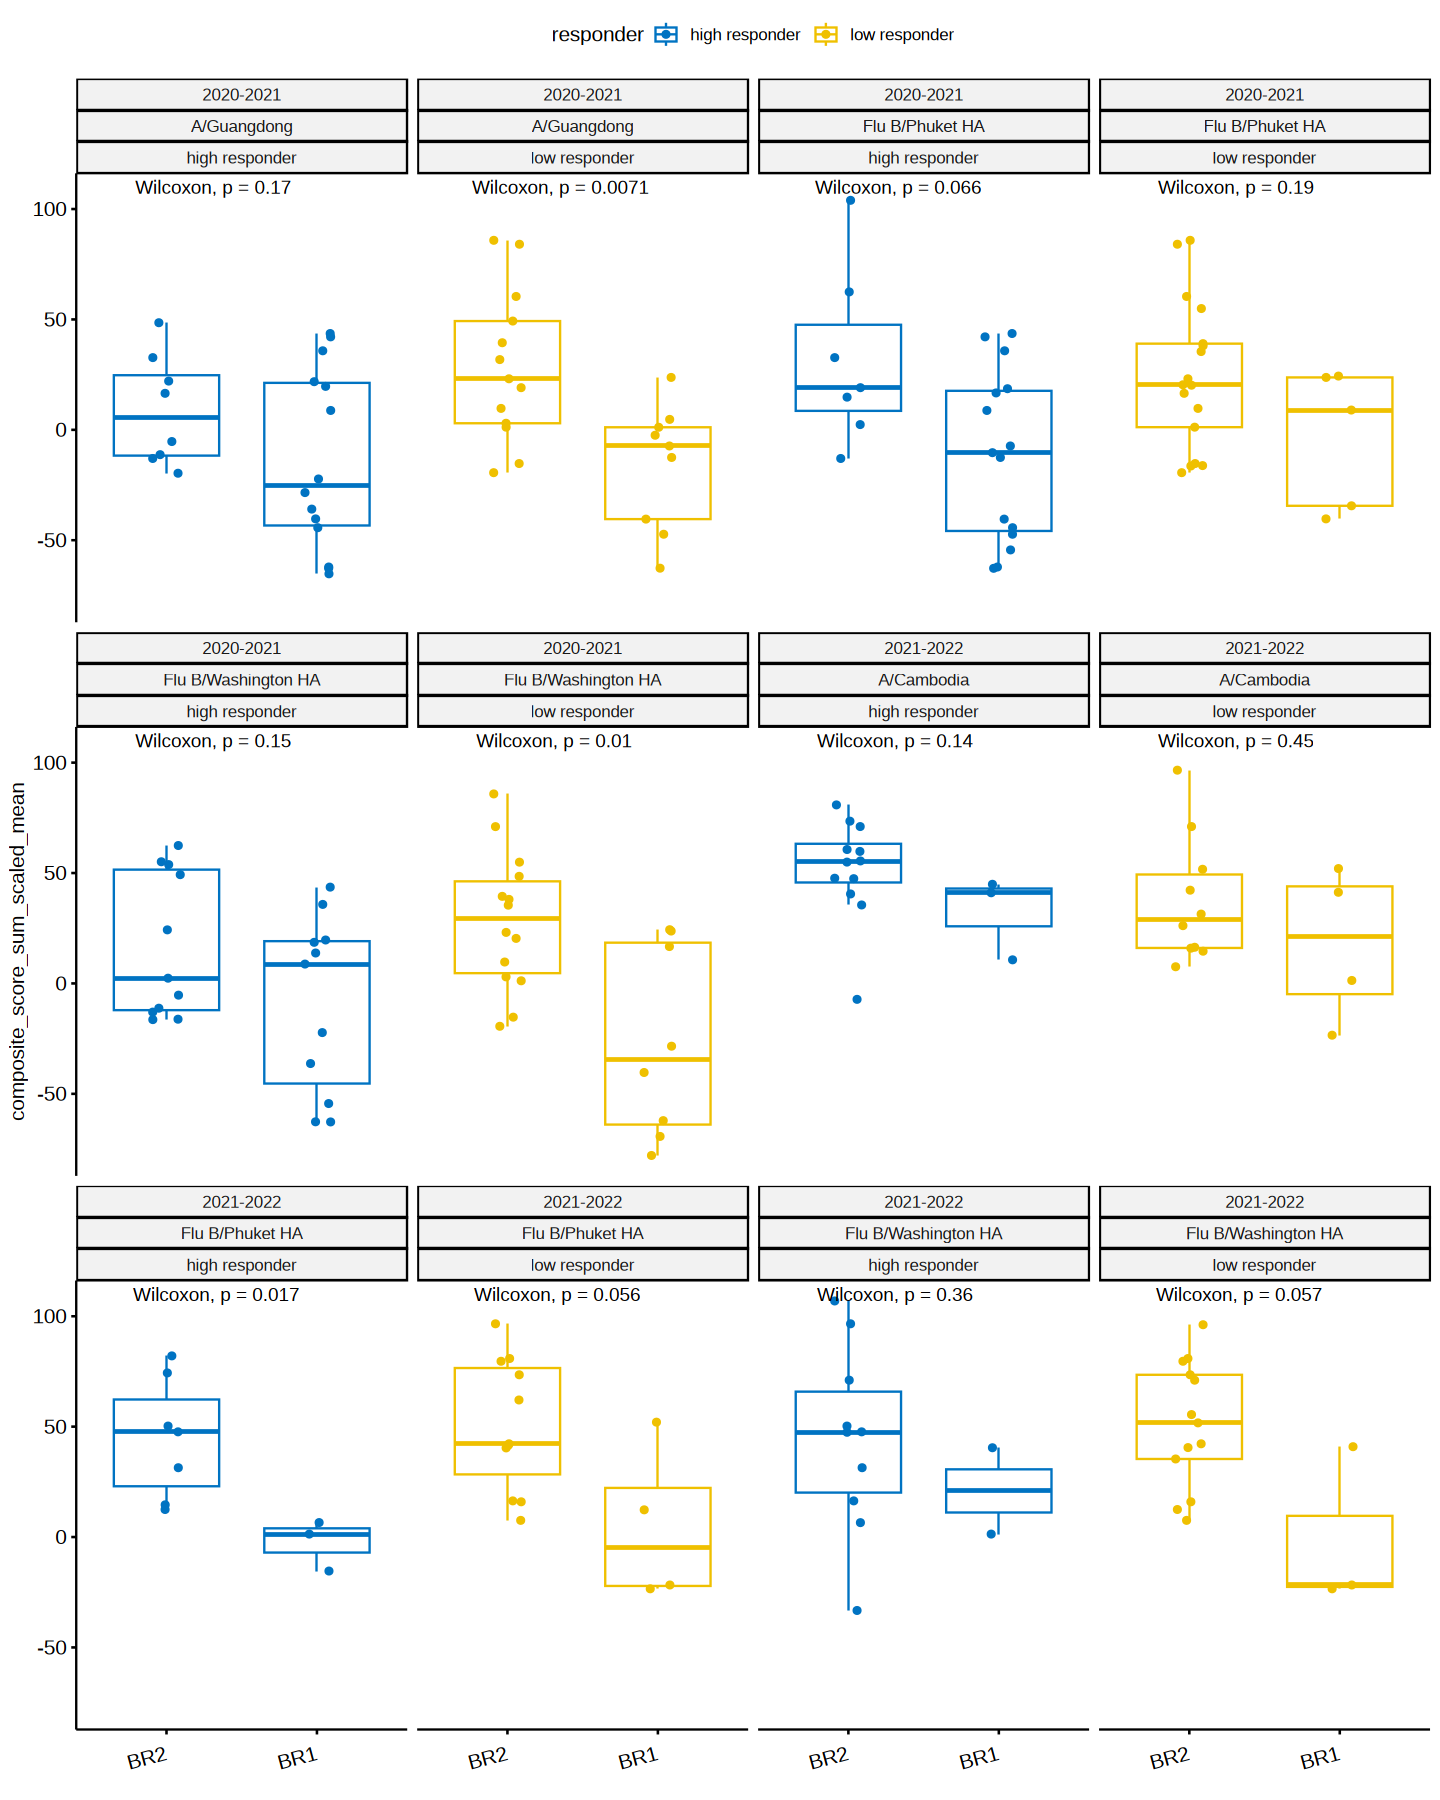

In [17]:
options(repr.plot.width = 12, repr.plot.height = 15)

ggboxplot(
response_group %>% filter(responder
                          %in% c("low responder","high responder")),
    x = "cohort.cohortGuid", y = "composite_score_sum_scaled_mean", color = "responder", palette = "jco",
    add = "jitter"
) + stat_compare_means() +
facet_wrap(~ Flu_Year +Assay +responder, ncol = 4) + theme(axis.text.x = element_text(
    angle = 15, vjust = 0.5,
    hjust = 1
))+xlab("")

Warning message:
“Removed 39 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 39 rows containing non-finite values (`stat_cor()`).”
Warning message:
“Removed 39 rows containing missing values (`geom_point()`).”


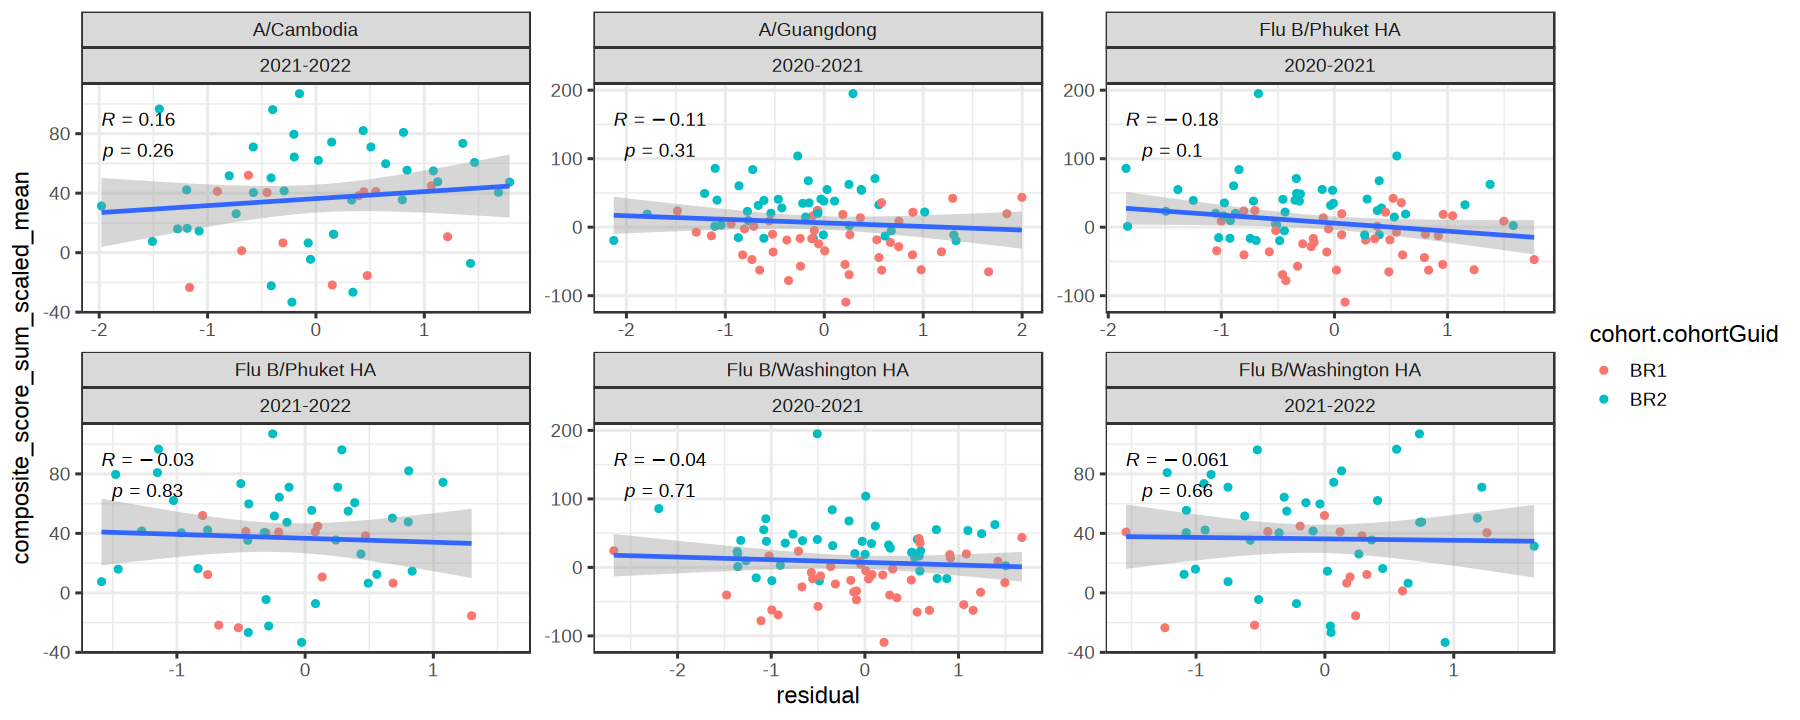

In [16]:
options(repr.plot.width = 15, repr.plot.height =6)

ggplot(response_group %>% filter(residual<2)  , 
       aes( `residual`, `composite_score_sum_scaled_mean`)) +            
  geom_point(aes(color=`cohort.cohortGuid`)) +                                     
  stat_smooth(method = "lm", formula = y ~ x, geom = "smooth") +
  facet_wrap( Assay~Flu_Year , scales = "free")+
  stat_cor(method = "spearman", label.sep = "\n")+theme_bw(base_size=14)